<a href="https://colab.research.google.com/github/rojaboina/Datathon/blob/main/Fireshed_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [3]:
#Load the dataset
data = pd.read_csv(r"/content/Fireshed_Registry.csv")
data

,S_USAFire_FireshedReg_FireshedOBJECTID,S_USAFire_FireshedReg_FireshedAREA_HA,S_USAFire_FireshedReg_FireshedFIRESHED_ID,S_USAFire_FireshedReg_FireshedFIRESHED_NAME,S_USAFire_FireshedReg_FireshedFIRESHED_CODE,S_USAFire_FireshedReg_FireshedFIRESHED_STATE,S_USAFire_FireshedReg_FireshedNOPAS,S_USAFire_FireshedReg_Fireshed_ExpOBJECTID,S_USAFire_FireshedReg_Fireshed_ExpFSHED_ID,S_USAFire_FireshedReg_Fireshed_ExpEXP_TOTAL,...,S_USAFire_FireshedReg_Fireshed_ExpEXP_NONFS_NONCONIFER_HIHAZ,S_USAFire_FireshedReg_Fireshed_ExpDIST_VS,S_USAFire_FireshedReg_Fireshed_ExpCRISIS_STRATEGY,S_USAFire_FireshedReg_Fireshed_ExpKEY_PERFORMANCE_INDICATOR,S_USAFire_FireshedReg_Fireshed_ExpNATIONAL_USFS_RANK,S_USAFire_FireshedReg_Fireshed_ExpNATIONAL_ALL_LAND_RANK,S_USAFire_FireshedReg_Fireshed_ExpREGIONAL_USFS_RANK,S_USAFire_FireshedReg_Fireshed_ExpREGIONAL_ALL_LAND_RANK,S_USAFire_FireshedReg_Fireshed_ExpSTART_DATE,S_USAFire_FireshedReg_Fireshed_ExpEND_DATE
0,1,59953,1,"Lynden, Washington",lynden_wa,WA,8,7689,1,0.036775,...,NaN,2021,NaN,NaN,NaN,4664,NaN,294,2021/01/01 00:00:00+00,9999/01/01 00:00:00+00
1,2,54588,2,"Friday Harbor, Washington",friday_harbor_wa,WA,10,7690,2,0.052446,...,NaN,2021,NaN,NaN,NaN,3637,NaN,235,2021/01/01 00:00:00+00,9999/01/01 00:00:00+00
2,3,116640,3,"Bellingham, Washington",bellingham_wa,WA,10,7691,3,0.128371,...,NaN,2021,NaN,NaN,NaN,3011,NaN,202,2021/01/01 00:00:00+00,9999/01/01 00:00:00+00
3,4,58787,4,"Classet, Washington",classet_wa,WA,5,7692,4,0.002450,...,NaN,2021,NaN,NaN,NaN,4630,NaN,291,2021/01/01 00:00:00+00,9999/01/01 00:00:00+00
4,5,88063,5,"Glacier, Washington",glacier_wa,WA,9,7693,5,0.022185,...,NaN,2021,NaN,NaN,1165.0,3871,156.0,245,2021/01/01 00:00:00+00,9999/01/01 00:00:00+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7683,7780,103226,7705,"Rookery Mound, Florida",rookery_mound_fl,FL,10,15372,7705,0.200187,...,NaN,2021,NaN,NaN,NaN,7687,NaN,2209,2021/01/01 00:00:00+00,9999/01/01 00:00:00+00
7684,7781,91096,7706,"Port Aransas, Texas",port_aransas_tx,TX,35,15373,7706,0.351242,...,NaN,2021,NaN,NaN,NaN,7688,NaN,2210,2021/01/01 00:00:00+00,9999/01/01 00:00:00+00
7685,7782,141834,7707,"McAllen, Texas",mcallen_tx,TX,15,15374,7707,14.278258,...,NaN,2021,NaN,NaN,NaN,5161,NaN,1749,2021/01/01 00:00:00+00,9999/01/01 00:00:00+00
7686,7783,100194,7708,"Harlingen, Texas",harlingen_tx,TX,11,15375,7708,2.154717,...,NaN,2021,NaN,NaN,NaN,4436,NaN,1667,2021/01/01 00:00:00+00,9999/01/01 00:00:00+00


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

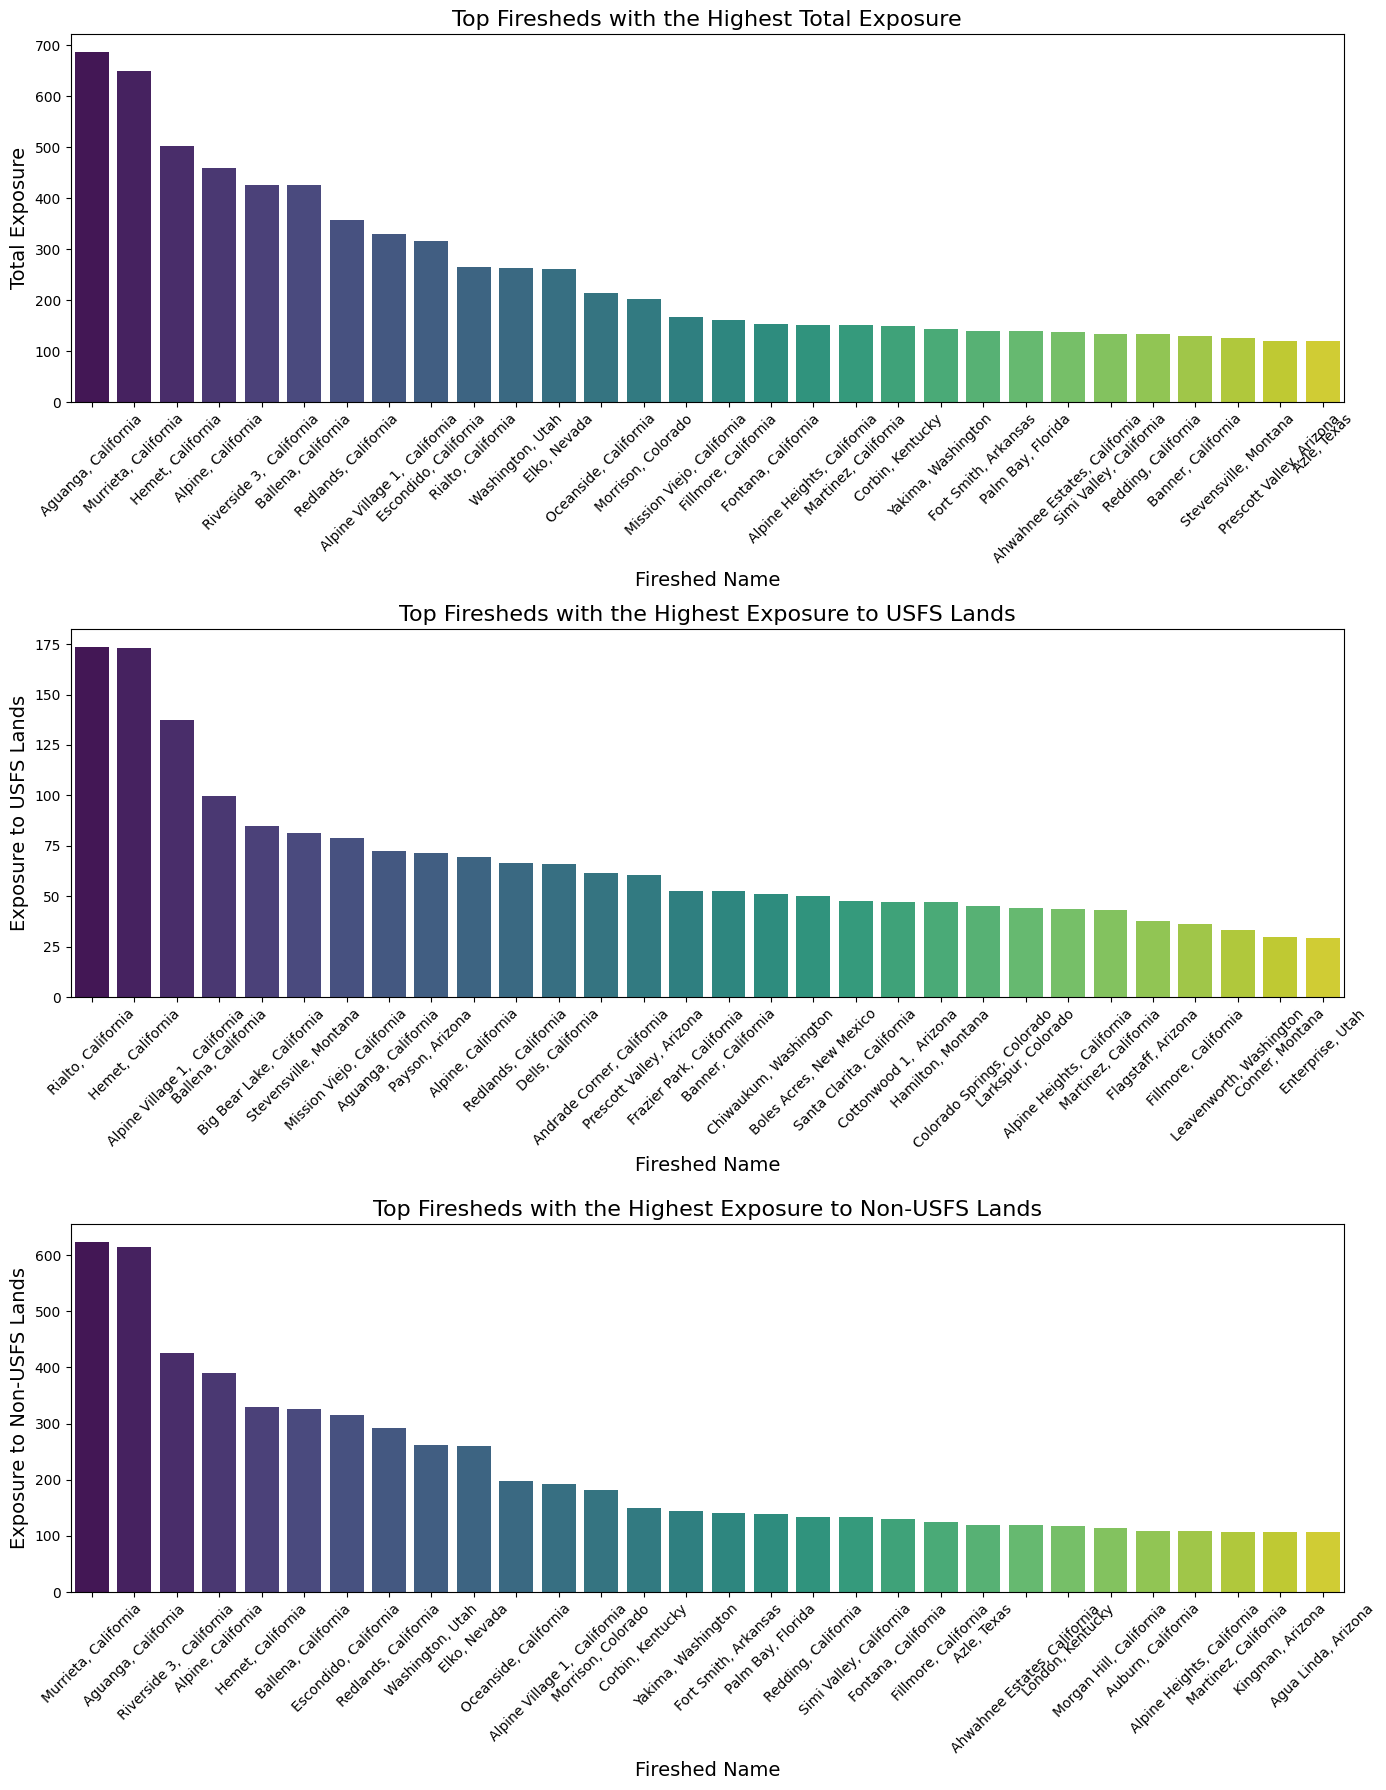

In [12]:
# Visualization for Exposure Analysis

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(14, 18))

# Bar plot for the top firesheds with the highest total exposure
sns.barplot(x=highest_total_exposure['S_USAFire_FireshedReg_FireshedFIRESHED_NAME'], y=highest_total_exposure['S_USAFire_FireshedReg_Fireshed_ExpEXP_TOTAL'], ax=ax[0], palette='viridis')
ax[0].set_title("Top Firesheds with the Highest Total Exposure", fontsize=16)
ax[0].set_xlabel("Fireshed Name", fontsize=14)
ax[0].set_ylabel("Total Exposure", fontsize=14)
ax[0].tick_params(axis='x', rotation=45)

#Bar plot for the top firesheds with the highest exposure to USFS lands
sns.barplot(x=highest_usfs_exposure['S_USAFire_FireshedReg_FireshedFIRESHED_NAME'], y=highest_usfs_exposure['S_USAFire_FireshedReg_Fireshed_ExpEXP_USFS'], ax=ax[1], palette='viridis')
ax[1].set_title("Top Firesheds with the Highest Exposure to USFS Lands", fontsize=16)
ax[1].set_xlabel("Fireshed Name", fontsize=14)
ax[1].set_ylabel("Exposure to USFS Lands", fontsize=14)
ax[1].tick_params(axis='x', rotation=45)

# Bar plot for the top firesheds with the highest exposure to non-USFS lands
sns.barplot(x=highest_non_usfs_exposure['S_USAFire_FireshedReg_FireshedFIRESHED_NAME'], y=highest_non_usfs_exposure['S_USAFire_FireshedReg_Fireshed_ExpEXP_NONFS'], ax=ax[2], palette='viridis')
ax[2].set_title("Top Firesheds with the Highest Exposure to Non-USFS Lands", fontsize=16)
ax[2].set_xlabel("Fireshed Name", fontsize=14)
ax[2].set_ylabel("Exposure to Non-USFS Lands", fontsize=14)
ax[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


#Create a composite risk score based on exposure metrics

In [15]:
# Create a composite risk score based on exposure metrics
data['Risk_Score'] = data[['S_USAFire_FireshedReg_Fireshed_ExpEXP_TOTAL',
                           'S_USAFire_FireshedReg_Fireshed_ExpEXP_USFS',
                           'S_USAFire_FireshedReg_Fireshed_ExpEXP_NONFS',
                           'S_USAFire_FireshedReg_Fireshed_ExpEXP_USFS_PROTECTED',
                           'S_USAFire_FireshedReg_Fireshed_ExpEXP_NONFS_PROTECTED']].sum(axis=1)

# Rank firesheds based on the risk score
data['Risk_Rank'] = data['Risk_Score'].rank(ascending=False)

# Display the top 10 firesheds with the highest risk
top_risk_firesheds = data[['S_USAFire_FireshedReg_FireshedFIRESHED_NAME', 'Risk_Score', 'Risk_Rank']].sort_values(by='Risk_Rank').head(10)
top_risk_firesheds


,S_USAFire_FireshedReg_FireshedFIRESHED_NAME,Risk_Score,Risk_Rank
2583,"Aguanga, California",1445.410324,1.0
2528,"Murrieta, California",1329.037885,2.0
2519,"Hemet, California",1108.682911,3.0
2656,"Alpine, California",961.842495,4.0
2606,"Ballena, California",887.145200,5.0
2495,"Riverside 3, California",851.718616,6.0
2563,"Alpine Village 1, California",772.924239,7.0
2476,"Redlands, California",757.509566,8.0
2627,"Escondido, California",639.378070,9.0
2437,"Rialto, California",593.320070,10.0


#Categorize firesheds into risk tiers (e.g., High, Medium, Low) based on their risk scores

In [16]:
# Categorize firesheds into risk tiers based on risk scores
quantiles = data['Risk_Score'].quantile([0.25, 0.5, 0.75])

def categorize_risk(score):
    if score >= quantiles[0.75]:
        return 'High'
    elif score >= quantiles[0.5]:
        return 'Medium'
    else:
        return 'Low'

data['Risk_Tier'] = data['Risk_Score'].apply(categorize_risk)

# Display the count of firesheds in each risk tier
risk_tier_counts = data['Risk_Tier'].value_counts()
risk_tier_counts

#can we do this by state?

Low       3844
Medium    1922
High      1922
Name: Risk_Tier, dtype: int64

In [ ]:
#Recommendations for Resource Allocation:
#High Risk Areas: Allocate 50% of resources. These are the areas most vulnerable to wildfires, and timely intervention can prevent significant damage.
#Medium Risk Areas: Allocate 30% of resources. While these areas are not as vulnerable as the high-risk areas, they still require considerable attention.
#Low Risk Areas: Allocate 20% of resources. Although these areas have a lower risk, it's essential to maintain some preventive measures and readiness.

<Figure size 1500x600 with 0 Axes>

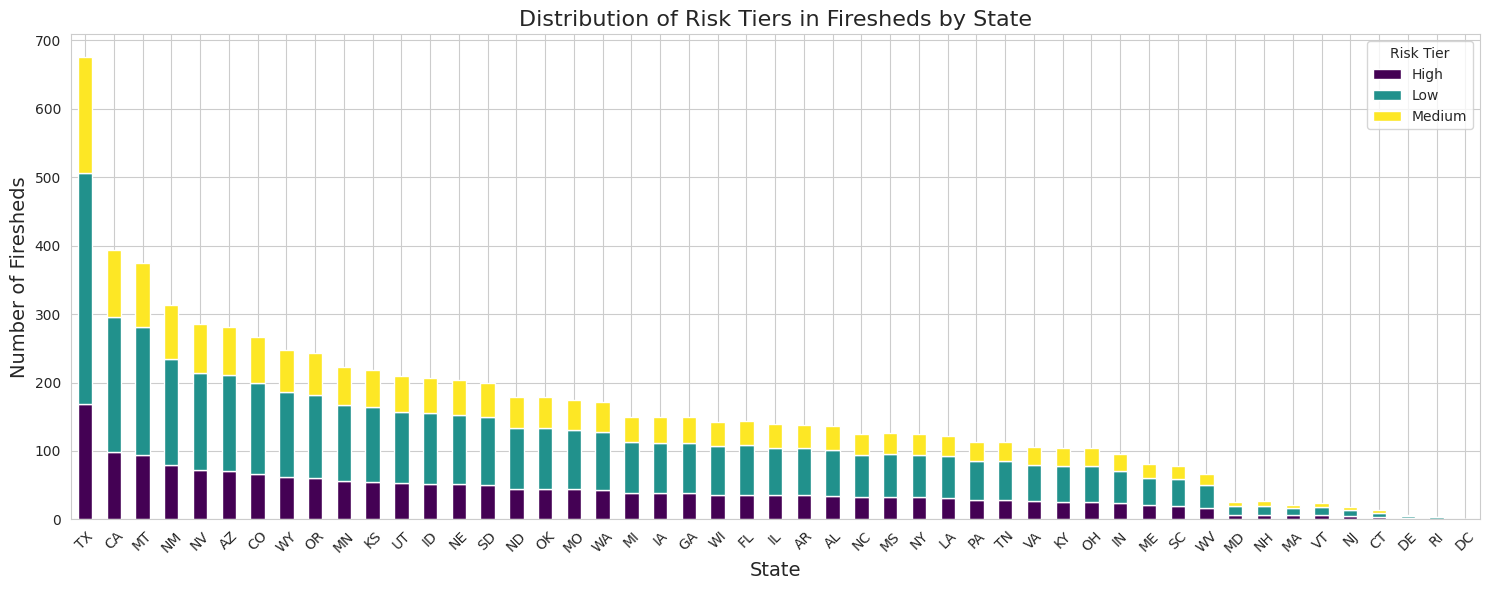

In [19]:
# Step 1: Calculate quantiles within each state.
state_quantiles = data.groupby('S_USAFire_FireshedReg_FireshedFIRESHED_STATE')['Risk_Score'].quantile([0.25, 0.5, 0.75]).unstack()

# Step 2: Define a function to categorize risk tiers based on quantiles.
def categorize_risk(row):
    quantiles = state_quantiles.loc[row['S_USAFire_FireshedReg_FireshedFIRESHED_STATE']]
    if row['Risk_Score'] >= quantiles[0.75]:
        return 'High'
    elif row['Risk_Score'] >= quantiles[0.5]:
        return 'Medium'
    else:
        return 'Low'

# Apply the function to categorize firesheds.
data['State_Risk_Tier'] = data.apply(categorize_risk, axis=1)

# Step 3: Count the number of firesheds in each risk tier by state.
risk_tier_by_state = data.groupby(['S_USAFire_FireshedReg_FireshedFIRESHED_STATE', 'State_Risk_Tier']).size().unstack(fill_value=0)

# Visualize the data with a stacked bar plot
plt.figure(figsize=(15, 6))
risk_tier_by_state.sort_values(by='High', ascending=False).plot(kind='bar', stacked=True, colormap='viridis', figsize=(15, 6))
plt.title("Distribution of Risk Tiers in Firesheds by State", fontsize=16)
plt.xlabel("State", fontsize=14)
plt.ylabel("Number of Firesheds", fontsize=14)
plt.legend(title='Risk Tier')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [21]:
# Extracting the highest-risk fireshed from each of the top 10 high-risk states
top_firesheds_per_state = high_risk_firesheds.loc[high_risk_firesheds.groupby('S_USAFire_FireshedReg_FireshedFIRESHED_STATE')['Risk_Score'].idxmax()]

# Selecting relevant columns and sorting by Risk Score
top_firesheds_table = top_firesheds_per_state[['S_USAFire_FireshedReg_FireshedFIRESHED_STATE', 'S_USAFire_FireshedReg_FireshedFIRESHED_NAME', 'Risk_Score']].sort_values(by='Risk_Score', ascending=False)
top_firesheds_table.head(10)  # Display top 10 rows for brevity.


,S_USAFire_FireshedReg_FireshedFIRESHED_STATE,S_USAFire_FireshedReg_FireshedFIRESHED_NAME,Risk_Score
2583,CA,"Aguanga, California",1445.410324
5599,KY,"Corbin, Kentucky",300.030734
228,WA,"Yakima, Washington",295.541230
7464,FL,"Palm Bay, Florida",286.994712
2516,AZ,"Prescott Valley, Arizona",242.608778
931,ID,"Mountain Home, Idaho",203.215447
6284,OK,"McAlester, Oklahoma",198.897139
5550,VA,"Wise, Virginia",147.987447
5373,WV,"Williamson, West Virginia",121.587909
4585,NJ,"Glassboro, New Jersey",77.527947


In [22]:
# Extracting the highest-risk fireshed from each of the top 10 high-risk states
top_firesheds_per_state = high_risk_firesheds.loc[high_risk_firesheds.groupby('S_USAFire_FireshedReg_FireshedFIRESHED_STATE')['Risk_Score'].idxmax()]

# Selecting relevant columns and sorting by Risk Score
top_firesheds_table = top_firesheds_per_state[['S_USAFire_FireshedReg_FireshedFIRESHED_STATE', 'S_USAFire_FireshedReg_FireshedFIRESHED_NAME', 'Risk_Score']].sort_values(by='Risk_Score', ascending=False)
top_firesheds_table.head(10)  # Display top 10 rows for brevity.


,S_USAFire_FireshedReg_FireshedFIRESHED_STATE,S_USAFire_FireshedReg_FireshedFIRESHED_NAME,Risk_Score
2583,CA,"Aguanga, California",1445.410324
5599,KY,"Corbin, Kentucky",300.030734
228,WA,"Yakima, Washington",295.541230
7464,FL,"Palm Bay, Florida",286.994712
2516,AZ,"Prescott Valley, Arizona",242.608778
931,ID,"Mountain Home, Idaho",203.215447
6284,OK,"McAlester, Oklahoma",198.897139
5550,VA,"Wise, Virginia",147.987447
5373,WV,"Williamson, West Virginia",121.587909
4585,NJ,"Glassboro, New Jersey",77.527947


In [26]:
# Extract relevant columns for analysis
state_exposure_data = data[['S_USAFire_FireshedReg_FireshedFIRESHED_STATE', 'S_USAFire_FireshedReg_FireshedFIRESHED_NAME', 'S_USAFire_FireshedReg_Fireshed_ExpEXP_TOTAL']]

# Rename columns for easier reference
state_exposure_data = state_exposure_data.rename(columns={
    'S_USAFire_FireshedReg_FireshedFIRESHED_STATE': 'State',
    'S_USAFire_FireshedReg_FireshedFIRESHED_NAME': 'Fireshed_Name',
    'S_USAFire_FireshedReg_Fireshed_ExpEXP_TOTAL': 'Total_Exposure'
})

# Calculate the sum of exposure for each state
statewise_exposure = state_exposure_data.groupby('State')['Total_Exposure'].sum().reset_index()

# Get the top 10 states with highest exposure (assuming exposure is indicative of risk)
top_states = statewise_exposure.nlargest(10, 'Total_Exposure')

# Get the firesheds with highest exposure in each of the top 10 states
top_firesheds = state_exposure_data[state_exposure_data['State'].isin(top_states['State'])].groupby('State').apply(lambda x: x.nlargest(1, 'Total_Exposure')).reset_index(drop=True)

top_states, top_firesheds


(   State  Total_Exposure
 3     CA    10949.803023
 8     FL     3561.404767
 41    TX     3463.529464
 34    OK     2929.224101
 2     AZ     2039.219271
 11    ID     1404.443218
 15    KY     1328.802155
 45    WA     1294.285289
 35    OR     1107.070924
 30    NM     1099.139684,
   State                       Fireshed_Name  Total_Exposure
 0    AZ            Prescott Valley, Arizona      120.091712
 1    CA                 Aguanga, California      687.460044
 2    FL                   Palm Bay, Florida      139.671963
 3    ID                     Eagle 1,  Idaho       90.714553
 4    KY                    Corbin, Kentucky      150.003414
 5    NM  Alpine Cellars Village, New Mexico      109.675764
 6    OK                 McAlester, Oklahoma       98.963607
 7    OR                 Grants Pass, Oregon       82.500095
 8    TX                         Azle, Texas      120.051900
 9    WA                  Yakima, Washington      143.425392)

# Building a model to predict future wildfires

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Selecting features and target variable
features = [
    'S_USAFire_FireshedReg_FireshedAREA_HA',
    'S_USAFire_FireshedReg_Fireshed_ExpEXP_USFS',
    'S_USAFire_FireshedReg_Fireshed_ExpEXP_NONFS',
    'S_USAFire_FireshedReg_Fireshed_ExpEXP_USFS_PROTECTED',
    'S_USAFire_FireshedReg_Fireshed_ExpEXP_NONFS_PROTECTED',
    'S_USAFire_FireshedReg_Fireshed_ExpEXP_USFS_MANAGEDFOREST',
    'S_USAFire_FireshedReg_Fireshed_ExpEXP_NONFS_MANAGEDFOREST'
]

target = 'S_USAFire_FireshedReg_Fireshed_ExpEXP_TOTAL'

# Handling potential NaN values
fireshed_data_clean = data[features + [target]].fillna(0)

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    fireshed_data_clean[features],
    fireshed_data_clean[target],
    test_size=0.2,
    random_state=42
)

# Training a Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
predictions = rf_model.predict(X_test)

# Model Evaluation
rmse = np.sqrt(mean_squared_error(y_test, predictions))

rmse


4.491810781597543

# States with different RSME factors

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Define features and target variable
features = [
    'S_USAFire_FireshedReg_FireshedAREA_HA',
    'S_USAFire_FireshedReg_Fireshed_ExpEXP_USFS',
    'S_USAFire_FireshedReg_Fireshed_ExpEXP_NONFS',
    'S_USAFire_FireshedReg_Fireshed_ExpEXP_USFS_PROTECTED',
    'S_USAFire_FireshedReg_Fireshed_ExpEXP_NONFS_PROTECTED',
    'S_USAFire_FireshedReg_Fireshed_ExpEXP_USFS_MANAGEDFOREST',
    'S_USAFire_FireshedReg_Fireshed_ExpEXP_NONFS_MANAGEDFOREST'
]

target = 'S_USAFire_FireshedReg_Fireshed_ExpEXP_TOTAL'

# Initialize a dictionary to store the RMSE for each state
statewise_rmse = {}

# Loop through each state
for state in data['S_USAFire_FireshedReg_FireshedFIRESHED_STATE'].unique():

    # Filter data for the current state
    state_data = data[data['S_USAFire_FireshedReg_FireshedFIRESHED_STATE'] == state]

    # Ensure there's enough data to split for training and testing
    if state_data.shape[0] > 1:
        # Extract features and target variable, and handle NaN values
        state_data_clean = state_data[features + [target]].fillna(0)

        # Split data into training and test sets
        X_train, X_test, y_train, y_test = train_test_split(
            state_data_clean[features],
            state_data_clean[target],
            test_size=0.2,
            random_state=42
        )

        # Train a Random Forest model
        rf_model = RandomForestRegressor(random_state=42)
        rf_model.fit(X_train, y_train)

        # Make predictions
        predictions = rf_model.predict(X_test)

        # Calculate and store the RMSE for the current state
        rmse = np.sqrt(mean_squared_error(y_test, predictions))
        statewise_rmse[state] = rmse

# Display RMSE for each state
statewise_rmse = {k: v for k, v in sorted(statewise_rmse.items(), key=lambda item: item[1], reverse=True)}
statewise_rmse


{'CA': 23.288511438870213,
 'WV': 7.038953639446258,
 'SC': 6.642336606441942,
 'AR': 5.05601199502528,
 'ID': 4.750836240016784,
 'TX': 4.277667958262464,
 'WA': 4.11776216124769,
 'MD': 4.0462578662351225,
 'DE': 2.6370821500802704,
 'NJ': 2.5137671582984966,
 'NM': 2.4494846260978274,
 'OK': 2.2537259342310443,
 'FL': 2.18482865672832,
 'OR': 2.14169391227069,
 'AZ': 1.5805384685979063,
 'VA': 1.566644643636066,
 'AL': 1.5041697564805183,
 'NV': 1.3554277861708495,
 'UT': 1.345010563445352,
 'TN': 1.0800184484204893,
 'CO': 1.053115508501593,
 'KY': 0.8379348007992122,
 'MS': 0.7598266110977302,
 'ND': 0.7430738894749298,
 'NC': 0.7208834908054373,
 'MT': 0.5508795027004346,
 'WY': 0.5098861675918506,
 'OH': 0.45280988154501456,
 'GA': 0.4406806467889672,
 'MA': 0.39043613283739537,
 'NE': 0.3778556125450214,
 'SD': 0.3572437868421939,
 'RI': 0.2870104897000002,
 'MN': 0.24787318850102735,
 'KS': 0.24593408193730812,
 'CT': 0.2306945324705163,
 'NH': 0.2253598690116647,
 'MO': 0.207